In [705]:
import matplotlib.pyplot as plt
import numpy as np

In [838]:
# Constants

# Flywheel Moment of Intertia
I = 1/2 * 0.5 * 0.1**2 # for 1000 g, 20 cm diameter flywheel

# Drag coefficient
c = 0.001

# timestep
dt = 0.1 # s

# number of iterations
n = 50

# Controller setpoint
setpoint = 100

In [879]:
# PID Gains

Kp =  5.010
Ki =  0.005
Kd =  -0.01

In [880]:
# Initial state (still)
theta = 0.0
omega = 0.0
integ = 0.0
err = 0.0

In [881]:
def step(theta, omega, tau):
    alpha = 1.0/I * (tau - c * omega)
    theta_next = theta + omega * dt
    omega_next = omega + alpha * dt
    
    return (theta_next, omega_next)

In [882]:
def controller(theta, omega, i, last_err, setpoint):
    err = setpoint - omega
    i += err #* dt
    d = (last_err - err) #/ dt
    u = Kp * err + Ki * i + Kd * d
    return (u, i, err)

In [883]:
omegas = [omega]
taus = [0.0]
integs = [integ]
for i in range(0, n):
    tau, integ, err = controller(theta, omega, integ, err, setpoint)
    tau = np.clip(tau, -1, 1)
    theta, omega = step(theta, omega, tau)
    omegas += [omega]
    
    taus += [tau]
    integs += [integ]

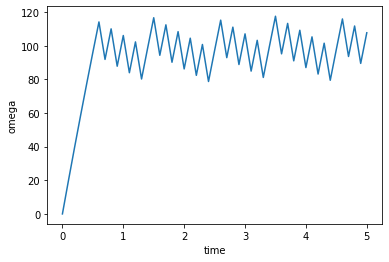

In [884]:
# plt.title('Dumb Controller')
plt.xlabel('time')
plt.ylabel('omega')
plt.plot([i*dt for i in range(n+1)], omegas)

In [845]:
omegas[-20:]

[103.3273400541631,
 102.81787507383588,
 102.36413488770393,
 101.96293484476692,
 101.61074011438072,
 101.30381342239187,
 101.03833433419273,
 100.81049395871354,
 100.61656858666551,
 100.45297542473473,
 100.31631324993403,
 100.2033904885908,
 100.11124292497126,
 100.0371429668486,
 99.97860214017595,
 99.93336825256777,
 99.89941845518203,
 99.87494924411752,
 99.85836427460484,
 99.84826071289285]

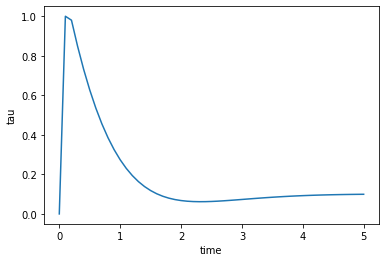

In [846]:
# plt.title('Dumb Controller')
plt.xlabel('time')
plt.ylabel('tau')
plt.plot([i*dt for i in range(n+1)], taus)

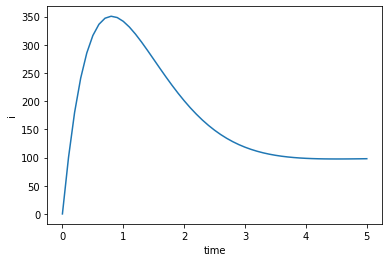

In [847]:
# plt.title('Dumb Controller')
plt.xlabel('time')
plt.ylabel('i')
plt.plot([i*dt for i in range(n+1)], integs)

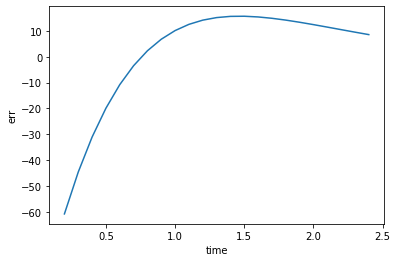

In [848]:
# plt.title('Error')
plt.xlabel('time')
plt.ylabel('err')
s,m = 2,25
plt.plot([i*dt for i in range(s,m)], [o-setpoint for o in omegas[s:m]])

In [442]:
omegas[0:10]

[0.0,
 399.99999999999994,
 -159.99999999999994,
 303.9999999999999,
 -217.5999999999999,
 269.44,
 -238.33599999999984,
 256.9984,
 -245.80095999999992,
 252.51942399999996]